In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/Nan

In [4]:
plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumGothic'] 10.0


##subway_raw 데이터 전처리

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls

drive  sample_data


In [8]:
import os
os.chdir('drive/MyDrive/AI+X선도인재양성프로젝트/003.지하철 이용승객 EDA분석_숙제_20220914/실습')
%load_ext autoreload
%autoreload 2

In [9]:
!ls

'1.지하철 이용승객 분석 EDA 프로젝트(1).ipynb'
'2호선 역 승차 빈도(합계).html'
'AI+X연습(김정우, 총합(sum)으로 그래프 구함).ipynb'
'AI+X연습(이상치를 평균으로 변환 후 주어진 문제들을 평균으로 구함).ipynb'
'AI+X연습(이상치를 평균으로 변환 후 주어진 문제들을 합계로 구함).ipynb'
'AI+X연습(총합(sum)으로 그래프 구함).ipynb'
'AI+X연습(평균으로 그래프 구함).ipynb'
 rawfiles
 rawfiles.zip
 subway_raw.csv
'subway_raw 데이터 전처리.ipynb'


In [10]:
raw_df = pd.read_csv('rawfiles/CARD_SUBWAY_MONTH_201901.csv')
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18329,20190131,우이신설경전철,북한산보국문,6195.0,5786.0,20190203
18330,20190131,우이신설경전철,정릉,4600.0,4211.0,20190203
18331,20190131,4호선,성신여대입구,3922.0,4289.0,20190203
18332,20190131,6호선,보문,1659.0,1693.0,20190203


In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18334 non-null  int64  
 1   노선명     18334 non-null  object 
 2   역명      18334 non-null  object 
 3   승차총승객수  18334 non-null  float64
 4   하차총승객수  18334 non-null  float64
 5   등록일자    18334 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 859.5+ KB


In [12]:
raw_df = pd.DataFrame()
for month in range(1, 7):
    temp_df = pd.read_csv(f'rawfiles/CARD_SUBWAY_MONTH_20190{month}.csv')
    raw_df = pd.concat([raw_df, temp_df], axis=0)

raw_df = raw_df.reset_index(drop=True)
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
107023,20190630,7호선,마들,6622.0,6116.0,20190703
107024,20190630,4호선,노원,14071.0,14702.0,20190703
107025,20190630,7호선,중계,9516.0,8981.0,20190703
107026,20190630,7호선,하계,11645.0,11121.0,20190703


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [14]:
raw_df['사용일자'] = pd.to_datetime(raw_df['사용일자'], format='%Y%m%d')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107028 non-null  datetime64[ns]
 1   노선명     107028 non-null  object        
 2   역명      107028 non-null  object        
 3   승차총승객수  107028 non-null  float64       
 4   하차총승객수  107028 non-null  float64       
 5   등록일자    107028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.9+ MB


In [15]:
raw_df['요일'] = raw_df['사용일자'].dt.dayofweek
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,1
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,1
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,1
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,1
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,1
...,...,...,...,...,...,...,...
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,6
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,6
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,6
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,6


In [16]:
day_of_week = {
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일'
}
raw_df['요일'] = raw_df['요일'].map(day_of_week)

In [17]:
raw_df['연월'] = raw_df['사용일자'].dt.strftime('%Y-%m')
raw_df['월일'] = raw_df['사용일자'].dt.strftime('%m-%d')
raw_df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,화,2019-01,01-01
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,화,2019-01,01-01
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,화,2019-01,01-01
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,화,2019-01,01-01
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,화,2019-01,01-01


In [18]:
raw_df['승하차총승객수'] = raw_df['승차총승객수'] + raw_df['하차총승객수']
raw_df = raw_df[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw_df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,화,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,화,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,화,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,화,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


In [19]:
raw_df.isna().sum()

,0
사용일자,0
요일,0
노선명,0
역명,0
승차총승객수,0
하차총승객수,0
승하차총승객수,0
연월,0
월일,0
등록일자,0


In [20]:
raw_df.duplicated(['사용일자','요일', '노선명', '역명', '연월', '월일'], keep=False).sum()

27324

In [21]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='을지로4가')]

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
394,2019-01-01,화,2호선,을지로4가,1406.0,1867.0,3273.0,2019-01,01-01,20190104


In [22]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='서울역')]

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
108,2019-01-01,화,4호선,서울역,5689.0,13266.0,18955.0,2019-01,01-01,20190104
117,2019-01-01,화,4호선,서울역,5983.0,731.0,6714.0,2019-01,01-01,20190104
295,2019-01-01,화,4호선,서울역,39420.0,31121.0,70541.0,2019-01,01-01,20190104
300,2019-01-01,화,4호선,서울역,1278.0,919.0,2197.0,2019-01,01-01,20190104
552,2019-01-01,화,4호선,서울역,14043.0,9955.0,23998.0,2019-01,01-01,20190104


In [23]:
raw_df = raw_df.groupby(['사용일자', '요일','노선명','역명','연월','월일', '등록일자']).sum().reset_index()

In [24]:
raw_df.duplicated(['사용일자','요일', '노선명', '역명', '연월', '월일'], keep=False).sum()

0

In [25]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='서울역')]

,사용일자,요일,노선명,역명,연월,월일,등록일자,승차총승객수,하차총승객수,승하차총승객수
199,2019-01-01,화,4호선,서울역,2019-01,01-01,20190104,66413.0,55992.0,122405.0


In [26]:
raw_df = raw_df[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일']]
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92129 entries, 0 to 92128
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   사용일자     92129 non-null  datetime64[ns]
 1   요일       92129 non-null  object        
 2   노선명      92129 non-null  object        
 3   역명       92129 non-null  object        
 4   승차총승객수   92129 non-null  float64       
 5   하차총승객수   92129 non-null  float64       
 6   승하차총승객수  92129 non-null  float64       
 7   연월       92129 non-null  object        
 8   월일       92129 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 6.3+ MB


In [27]:
raw_df.describe()

,사용일자,승차총승객수,하차총승객수,승하차총승객수
count,92129,92129.000000,92129.000000,92129.000000
mean,2019-04-01 00:00:00,14618.749427,14559.237580,29177.987007
min,2019-01-01 00:00:00,16.000000,16.000000,38.000000
25%,2019-02-15 00:00:00,4417.000000,4205.000000,8637.000000
50%,2019-04-01 00:00:00,9543.000000,9280.000000,18870.000000
75%,2019-05-16 00:00:00,18712.000000,18576.000000,37359.000000
max,2019-06-30 00:00:00,143774.000000,167980.000000,311754.000000
std,NaN,16167.904767,16527.224179,32672.526322


In [28]:
raw_df.describe(include='object')

,요일,노선명,역명,연월,월일
count,92129,92129,92129,92129,92129
unique,7,19,509,6,181
top,화,1호선,가능,2019-01,01-01
freq,13234,16109,181,15779,509


In [29]:
raw_df

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01
...,...,...,...,...,...,...,...,...,...
92124,2019-06-30,일,우이신설경전철,솔샘,3175.0,2902.0,6077.0,2019-06,06-30
92125,2019-06-30,일,우이신설경전철,정릉,2960.0,2551.0,5511.0,2019-06,06-30
92126,2019-06-30,일,우이신설경전철,화계,2234.0,2114.0,4348.0,2019-06,06-30
92127,2019-06-30,일,인천2호선,검암,5113.0,5395.0,10508.0,2019-06,06-30


In [30]:
df = raw_df.copy()

##2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하차총승객수)

In [31]:
passengers_of_day = df[['사용일자', '역명', '승하차총승객수']].copy()
passengers_of_day['사용일자'] = passengers_of_day['사용일자'].astype(str)
passengers_of_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92129 entries, 0 to 92128
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   사용일자     92129 non-null  object 
 1   역명       92129 non-null  object 
 2   승하차총승객수  92129 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.1+ MB


In [32]:
passengers_of_day.min()

,0
사용일자,2019-01-01
역명,4.19민주묘지
승하차총승객수,38.0


In [33]:
passengers_of_day = passengers_of_day.groupby(['사용일자'])['승하차총승객수'].mean()
passengers_of_day.head()

,승하차총승객수
사용일자,
2019-01-01,13385.958743
2019-01-02,29889.984283
2019-01-03,30876.646365
2019-01-04,32434.736739
2019-01-05,23757.043222


In [34]:
passengers_of_day = passengers_of_day.sort_values(ascending=False)
passengers_of_day

,승하차총승객수
사용일자,
2019-05-03,36199.428291
2019-05-10,35948.573674
2019-05-24,35574.554028
2019-05-17,35530.860511
2019-04-12,35348.939096
...,...
2019-02-06,14659.198428
2019-01-01,13385.958743
2019-02-03,13375.119843


In [35]:
passengers_of_day_top10 = passengers_of_day[:10]
passengers_of_day_top10

,승하차총승객수
사용일자,
2019-05-03,36199.428291
2019-05-10,35948.573674
2019-05-24,35574.554028
2019-05-17,35530.860511
2019-04-12,35348.939096
2019-03-08,35264.129666
2019-03-29,35236.017682
2019-04-05,35075.758350
2019-03-22,34988.840864


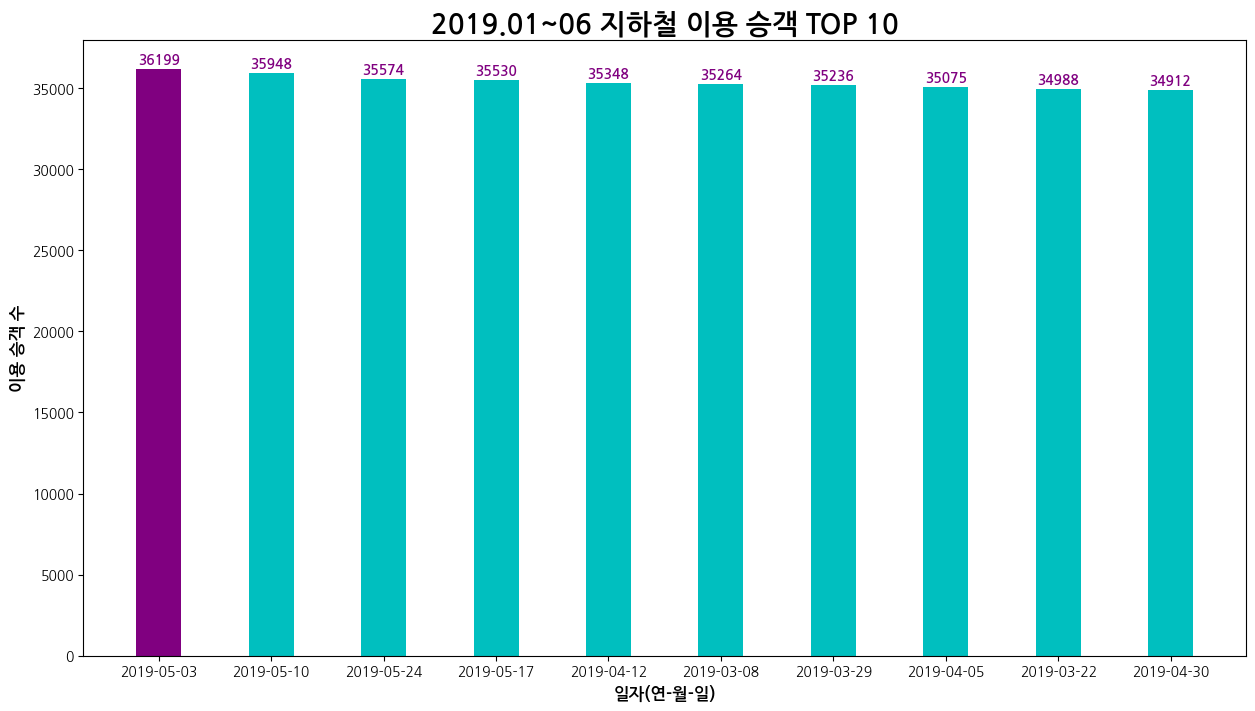

In [36]:
color = ['purple','c','c','c','c','c','c','c','c','c']
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(passengers_of_day_top10.index, passengers_of_day_top10.values, width=0.4, color=color)
for idx, val in passengers_of_day_top10.items():
        plt.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points', ha='center', color='purple',fontsize=10, fontweight='bold')
ax.set_title('2019.01~06 지하철 이용 승객 TOP 10', fontsize=20, fontweight='bold')
ax.set_xlabel('일자(연-월-일)', fontsize=12, fontweight='bold')
ax.set_ylabel('이용 승객 수', fontsize=12, fontweight='bold')
plt.show()

In [37]:
passengers_of_day.idxmax()

'2019-05-03'

##1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하차총승객수)

In [43]:
pd.options.display.float_format = '{:.0f}'.format # pandas는 큰 숫자를 지수 표기법(exponential notation)으로 출력할 때가 있음. 이를 방지하기 위한 코드.
passengers_of_month = df[['연월', '월일', '승하차총승객수']]
passengers_of_month = passengers_of_month.groupby(['연월','월일'])['승하차총승객수'].sum()
passengers_of_month = passengers_of_month.reset_index()
passengers_of_month = passengers_of_month.groupby('연월')['승하차총승객수'].mean()
passengers_of_month

,승하차총승객수
연월,
2019-01,14282142
2019-02,13565572
2019-03,15054607
2019-04,15697812
2019-05,15668341
2019-06,14740354


In [44]:
passengers_of_month.idxmax()

'2019-04'

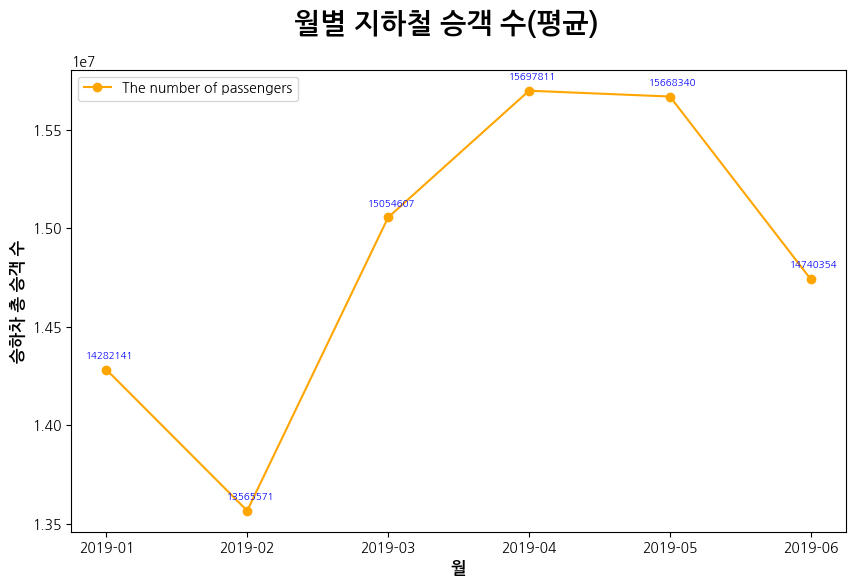

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(passengers_of_month, marker='o', c='orange', label='The number of passengers')
ax.set_xlabel('월', fontsize=12, fontweight='bold')
ax.set_ylabel('승하차 총 승객 수', fontsize=12, fontweight='bold')

ax.legend(loc='upper left')
for idx, val in passengers_of_month.items():
    ax.annotate(int(val), (idx, val), xytext=(2, 8), textcoords='offset points', ha='center', fontsize=7, color='blue')
fig.suptitle('월별 지하철 승객 수(평균)', fontsize=20, fontweight='bold')
plt.show()

##요일중에서 목요일에 지하철 승객수가 많다? (기준 :승하차총승객수)

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
df_week = df[['월일', '요일', '승하차총승객수']]
df_week = df_week.groupby(['월일','요일'])['승하차총승객수'].sum()
df_week = df_week.reset_index()
df_week = df_week.groupby('요일')['승하차총승객수'].mean()
df_week = df_week.reindex(['월', '화', '수', '목', '금', '토', '일'])
df_week

,승하차총승객수
요일,
월,1.566222e+07
화,1.584538e+07
수,1.619747e+07
목,1.648786e+07
금,1.712734e+07
토,1.315192e+07
일,9.520154e+06


In [ ]:
print(f"<<<평균적으로>>> 가장 많은 승객들이 지하철을 이용하는 요일: {df_week.idxmax()}(평균 이용승객 수: {round(df_week.max())})")

<<<평균적으로>>> 가장 많은 승객들이 지하철을 이용하는 요일: 금(평균 이용승객 수: 17127335)


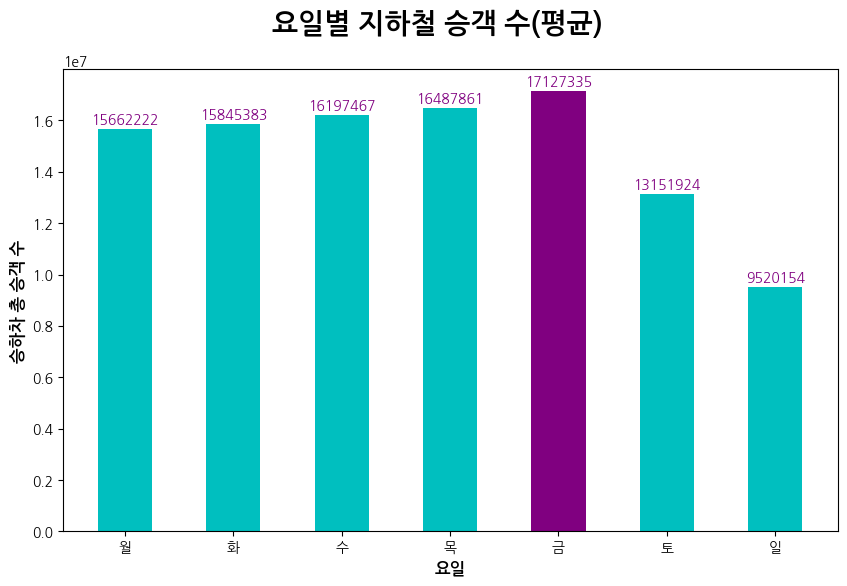

In [ ]:
colors = ['c','c','c','c','purple','c','c']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_week.index, df_week.values, color=colors, width=0.5)
ax.set_xlabel('요일', fontsize=12, fontweight='bold')
ax.set_ylabel('승하차 총 승객 수', fontsize=12, fontweight='bold')
for idx, val in df_week.items():
    plt.annotate(round(val), (idx, val), xytext=(0,4),
                 textcoords='offset points', ha='center', color='purple',fontsize=10)
fig.suptitle('요일별 지하철 승객 수(평균)', fontsize=20, fontweight='bold')
plt.show()

##일자별(월일별) 승하차승객수 그래프 그려 볼까요? (기준 :승하차총승객수)

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
test_df = df[['사용일자', '노선명', '역명']]
test_df['역명'].duplicated()

,역명
0,False
1,False
2,False
3,False
4,False
...,...
92124,True
92125,True
92126,True
92127,True


In [ ]:
df_MD = df[['월일', '승하차총승객수']]
df_MD = df_MD.groupby(['월일'])['승하차총승객수'].mean()
df_MD

,승하차총승객수
월일,
01-01,13385.958743
01-02,29889.984283
01-03,30876.646365
01-04,32434.736739
01-05,23757.043222
...,...
06-26,32537.897839
06-27,32152.542240
06-28,33734.208251


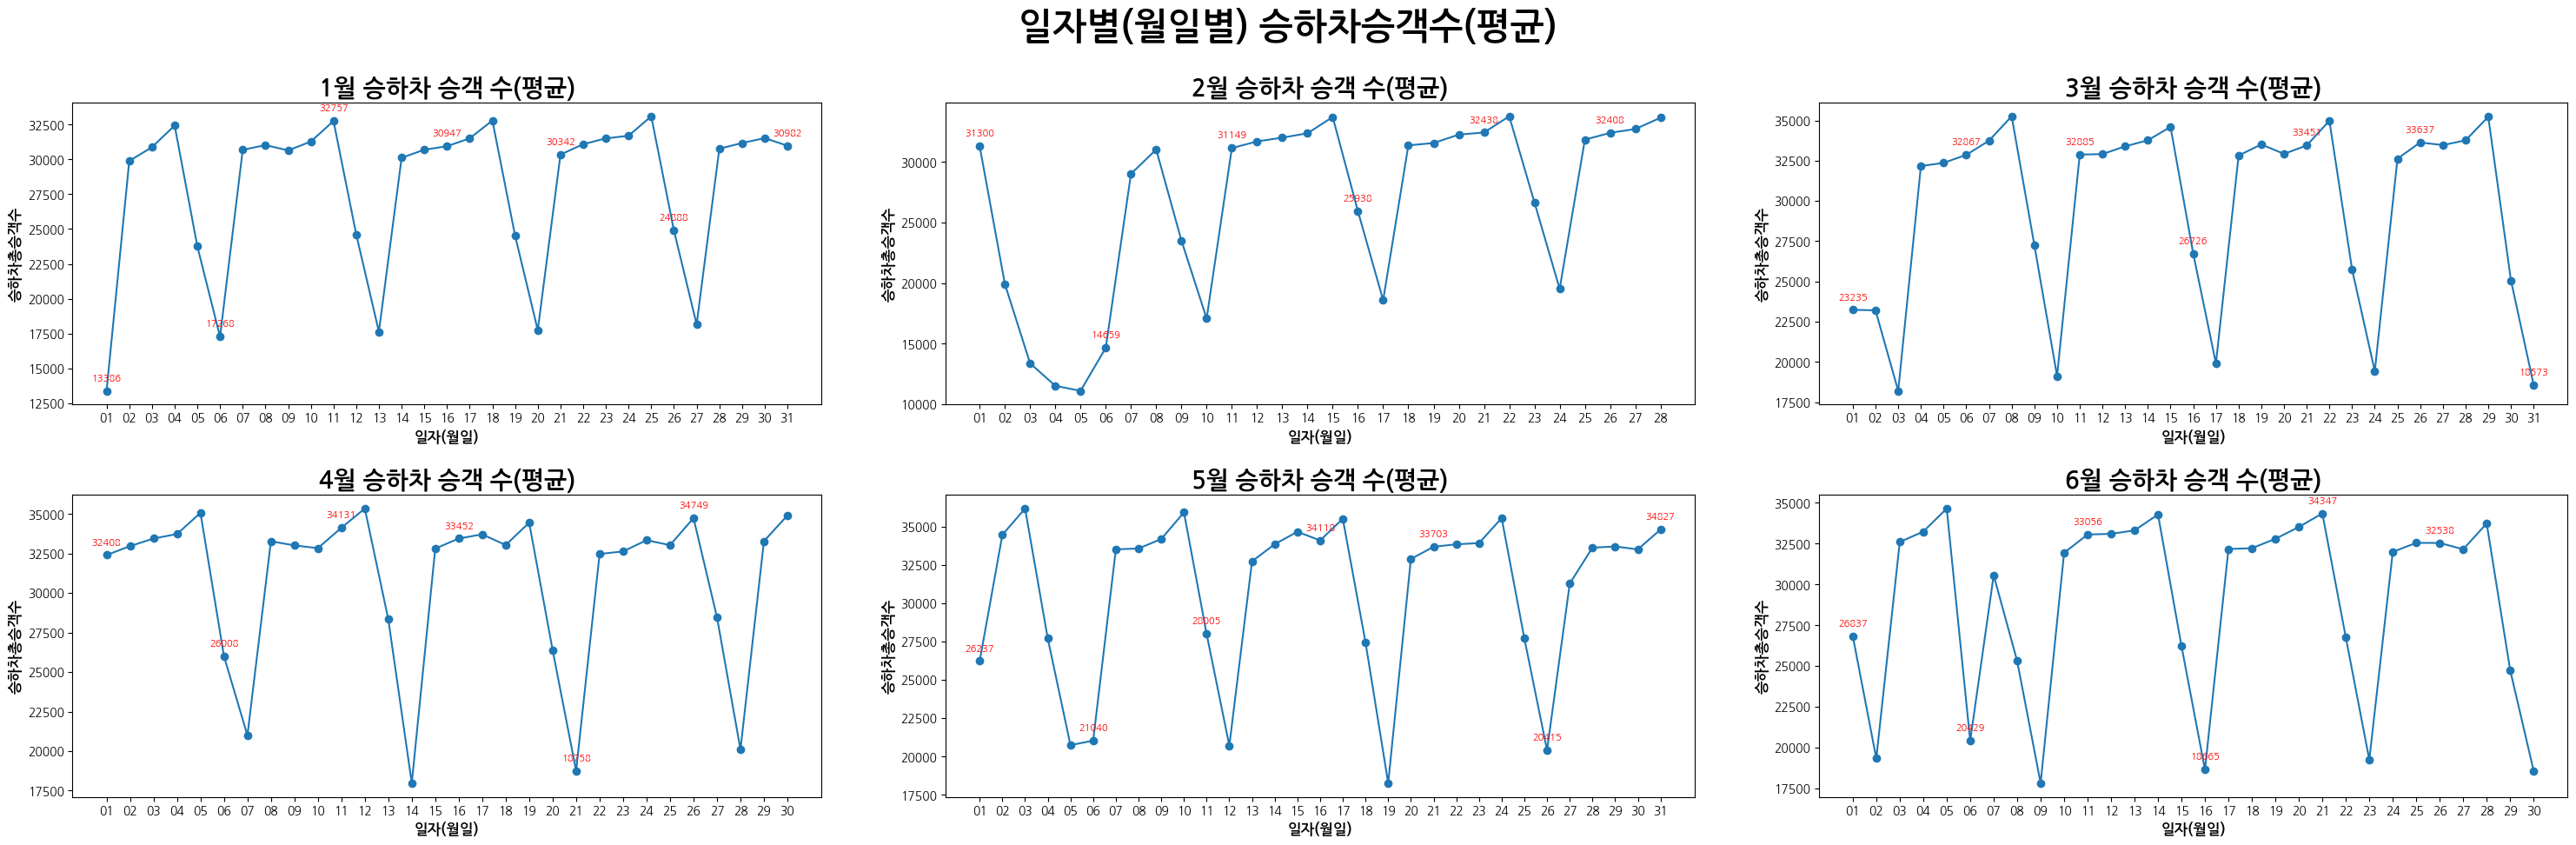

In [ ]:
month = 1

fig, axes = plt.subplots(2, 3, figsize=(30, 10))
for r in range(2):
    for c in range(3):
        df_M = df_MD[df_MD.index.str.startswith(f'0{month}')]
        day_list = df_M.index.str.split('-')
        day_list = day_list.str.get(1)
        axes[r,c].plot(day_list, df_M.values, marker='o')
        for idx, val in zip(day_list[::5], df_M[::5].values):
            axes[r,c].annotate(round(val), (idx, val), xytext=(0, 8), textcoords='offset points', fontsize=8, ha='center', color='red')
        axes[r,c].set_xlabel('일자(월일)', fontsize=12, fontweight='bold')
        axes[r,c].set_ylabel('승하차총승객수', fontsize=12, fontweight='bold')
        axes[r,c].set_title(f'{month}월 승하차 승객 수(평균)', fontsize=20, fontweight='bold')
        month += 1
fig.suptitle('일자별(월일별) 승하차승객수(평균)', fontsize=30, fontweight='bold')
fig.set_layout_engine('tight', pad=2.0, h_pad=2.0, w_pad=5.0)
plt.show()

##가장 승객이 많이 타는 승차역은?

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
df_stations = df.groupby(['역명'])['승차총승객수'].mean()
df_stations

,승차총승객수
역명,
4.19민주묘지,3278.685083
가능,7290.977901
가락시장,17863.502762
가산디지털단지,55863.629834
가양,20876.447514
...,...
회기,29855.397790
회룡,13395.690608
회현,30845.403315


In [ ]:
df_stations.sort_values(ascending=False)

,승차총승객수
역명,
잠실,102620.569061
강남,100265.325967
고속터미널,96913.187845
홍대입구,95414.828729
서울역,94837.558011
...,...
신원,237.640884
백양리,188.911602
굴봉산,188.127072


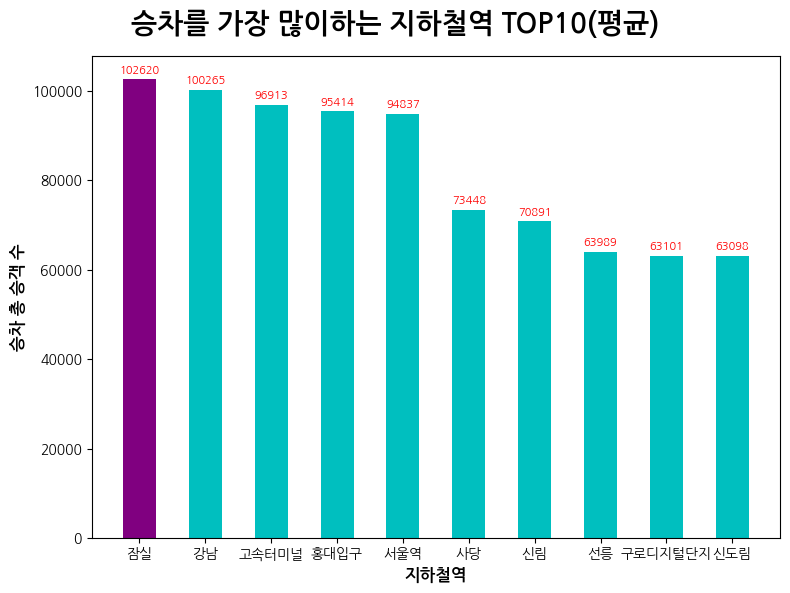

In [ ]:
colors = ['purple','c','c','c','c','c','c','c','c','c']
station_top10 = df_stations.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(station_top10.index, station_top10.values, width=0.5, color=colors)
for idx, val in station_top10.items():
    ax.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points', fontsize=8, ha='center', color='red')
ax.set_xlabel('지하철역', fontsize=12, fontweight='bold')
ax.set_ylabel('승차 총 승객 수', fontsize=12, fontweight='bold')
fig.suptitle('승차를 가장 많이하는 지하철역 TOP10(평균)', fontsize=20, fontweight='bold')
fig.set_layout_engine('tight')
plt.show()

In [ ]:
print(f'평균적으로 승차를 가장 많이하는 지하철역: {df_stations.idxmax()} || 승차 승객 수: {int(df_stations.max())}')

평균적으로 승차를 가장 많이하는 지하철역: 잠실 || 승차 승객 수: 102620


##노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선, 역별/요일별 heatmap)

In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(50, 60))

line_number = 1

for r in range(3):
    for c in range(3):
        df_line = df[df['노선명']==f'{line_number}호선']
        df_line = df_line.groupby(['역명', '요일'])['승차총승객수'].mean()
        df_line = df_line.reset_index()
        df_line = df_line.pivot_table(index='역명', columns='요일', values='승차총승객수')
        df_line = df_line[['월', '화', '수', '목', '금', '토', '일']]
        df_line = df_line.astype('int')
        sns.heatmap(df_line, linewidths=0.5, cmap='Blues', annot=True, fmt='d', ax=axes[r,c])
        axes[r,c].set_title(f'{line_number}호선 역별/요일별 승차승객수(평균)', fontsize=20, fontweight='bold')
        axes[r,c].set_xlabel(f'요일', fontsize=20, fontweight='bold')
        axes[r,c].set_ylabel(f'{line_number}호선 역명', fontsize=20, fontweight='bold')
        line_number += 1

fig.set_layout_engine('tight', pad=5.0, h_pad=5.0, w_pad=5.0)
fig.suptitle('지하철 역별/요일별 승차승객수(평균)', fontsize=30, fontweight='bold')
plt.plot()

Output hidden; open in https://colab.research.google.com to view.

##1호선에서 가장 하차를 많이 하는 역은? (groupby)

In [ ]:
df[['사용일자', '노선명', '역명']].value_counts().head(10)

사용일자        노선명  역명
2019-01-01  1호선  가능    1
2019-05-01  7호선  중화    1
            9호선  개화    1
                 가양    1
            8호선  장지    1
                 암사    1
                 신흥    1
                 수진    1
                 송파    1
                 석촌    1
Name: count, dtype: int64

In [ ]:
df[(df['역명']=='서울역') & (df['노선명']=='경의선')]

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일


In [ ]:
df[(df['사용일자']=='2019-04-14')	& (df['노선명']=='4호선')& (df['역명']=='서울역')]

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
52626,2019-04-14,일,4호선,서울역,73637.0,69278.0,142915.0,2019-04,04-14


In [ ]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01


In [ ]:
df_line1 = df[df['노선명']=='1호선']
df_line1 = df_line1.groupby(['역명'])['하차총승객수'].mean()
df_line1

,하차총승객수
역명,
가능,6837.237569
가산디지털단지,58405.419890
간석,6341.237569
개봉,24454.773481
관악,8274.491713
...,...
천안,7260.237569
평택,14345.060773
화서,8398.441989


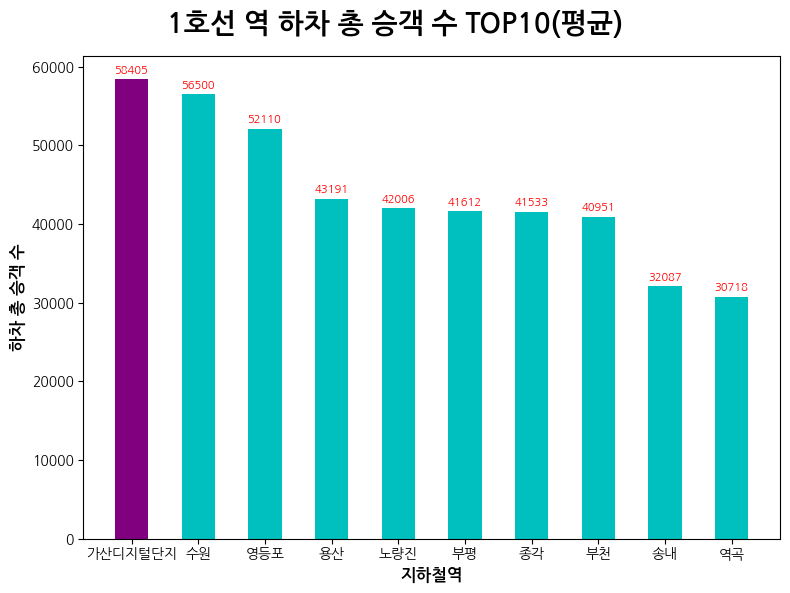

In [ ]:
colors = ['purple','c','c','c','c','c','c','c','c','c']
line1_station_top10 = df_line1.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1_station_top10.index, line1_station_top10.values, width=0.5, color=colors)
for idx, val in df_line1.items():
    ax.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points', fontsize=8, ha='center', color='red')

ax.set_xlabel('지하철역', fontsize=12, fontweight='bold')
ax.set_ylabel('하차 총 승객 수', fontsize=12, fontweight='bold')
fig.suptitle('1호선 역 하차 총 승객 수 TOP10(평균)', fontsize=20, fontweight='bold')
fig.set_tight_layout(True)
plt.show()

In [ ]:
print(f'평균적으로 1호선에서 하차를 가장 많이하는 지하철역: {df_line1.idxmax()} || 하차 승객 수: {int(df_line1.max())}')

평균적으로 1호선에서 하차를 가장 많이하는 지하철역: 가산디지털단지 || 하차 승객 수: 58405


##2호선중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium 역 표시)

In [ ]:
subway_location_df = pd.read_csv('rawfiles/지하철노선위경도정보2.csv')
subway_location_df.head()

,역이름,역지역,위도,경도,호선
0,낙성대,수도권,37.477090,126.963506,2호선
1,구룡,수도권,37.487027,127.059475,분당선
2,서울대입구,수도권,37.481285,126.952695,2호선
3,불광,수도권,37.610044,126.930302,3호선
4,월롱,수도권,37.796204,126.792563,경의선


In [ ]:
subway_lon_lat_df = df.merge(subway_location_df, left_on='역명', right_on='역이름')

In [ ]:
subway_lon_lat_df = subway_lon_lat_df[subway_lon_lat_df['노선명'] == subway_lon_lat_df['호선']]
subway_lon_lat_df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,역이름,역지역,위도,경도,호선
0,2019-01-01,화,1호선,가능,3650.0,3455.0,7105.0,2019-01,01-01,가능,수도권,37.748393,127.044275,1호선
1,2019-01-01,화,1호선,가산디지털단지,16504.0,17224.0,33728.0,2019-01,01-01,가산디지털단지,수도권,37.480389,126.882644,1호선
3,2019-01-01,화,1호선,간석,3092.0,3200.0,6292.0,2019-01,01-01,간석,수도권,37.464696,126.693513,1호선
4,2019-01-01,화,1호선,개봉,11366.0,11785.0,23151.0,2019-01,01-01,개봉,수도권,37.494634,126.858693,1호선
5,2019-01-01,화,1호선,관악,4410.0,4188.0,8598.0,2019-01,01-01,관악,수도권,37.419557,126.908496,1호선


In [ ]:
line2_info = subway_lon_lat_df[subway_lon_lat_df['노선명']=='2호선']
line2_info.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,역이름,역지역,위도,경도,호선
108,2019-01-01,화,2호선,강남,38729.0,36544.0,75273.0,2019-01,01-01,강남,수도권,37.498085,127.027978,2호선
110,2019-01-01,화,2호선,강변,29375.0,27265.0,56640.0,2019-01,01-01,강변,수도권,37.535118,127.094723,2호선
111,2019-01-01,화,2호선,건대입구,38542.0,39275.0,77817.0,2019-01,01-01,건대입구,수도권,37.540398,127.069203,2호선
113,2019-01-01,화,2호선,교대,12027.0,11552.0,23579.0,2019-01,01-01,교대,수도권,37.492736,127.013863,2호선
117,2019-01-01,화,2호선,구로디지털단지,24511.0,25162.0,49673.0,2019-01,01-01,구로디지털단지,수도권,37.485253,126.901473,2호선


In [ ]:
# 평균 다른 이유에 대한 이유 찾기
# line2_info에 사용일자도 추가한 후 []'역이름', '역지역', '위도', '경도', '호선']으로 groupby후 ['승차총승객수'].mean() 실행해보기 -> 같네요...

In [ ]:
line2_lon_lat = line2_info[['사용일자', '역이름', '역지역', '위도', '경도', '호선', '승차총승객수']]
line2_lon_lat.head()

,사용일자,역이름,역지역,위도,경도,호선,승차총승객수
108,2019-01-01,강남,수도권,37.498085,127.027978,2호선,38729.0
110,2019-01-01,강변,수도권,37.535118,127.094723,2호선,29375.0
111,2019-01-01,건대입구,수도권,37.540398,127.069203,2호선,38542.0
113,2019-01-01,교대,수도권,37.492736,127.013863,2호선,12027.0
117,2019-01-01,구로디지털단지,수도권,37.485253,126.901473,2호선,24511.0


In [ ]:
line2_lon_lat.max()

,0
사용일자,2019-06-30 00:00:00
역이름,홍대입구
역지역,수도권
위도,37.574055
경도,127.1038
호선,2호선
승차총승객수,143774.0


In [ ]:
line2_lon_lat = line2_lon_lat.groupby(['역이름', '역지역', '위도', '경도', '호선'])['승차총승객수'].mean()
line2_lon_lat = line2_lon_lat.reset_index().sort_values(by='승차총승객수', ascending=False)
line2_lon_lat.head()

,역이름,역지역,위도,경도,호선,승차총승객수
39,잠실,수도권,37.513309,127.100215,2호선,102620.569061
0,강남,수도권,37.498085,127.027978,2호선,100265.325967
46,홍대입구,수도권,37.556864,126.923765,2호선,95414.828729
15,사당,수도권,37.476553,126.981549,2호선,73448.900552
27,신림,수도권,37.484264,126.929741,2호선,70891.569061


In [ ]:
line2_lon_lat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 39 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역이름     47 non-null     object 
 1   역지역     47 non-null     object 
 2   위도      47 non-null     float64
 3   경도      47 non-null     float64
 4   호선      47 non-null     object 
 5   승차총승객수  47 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.6+ KB


In [ ]:
!pip install folium

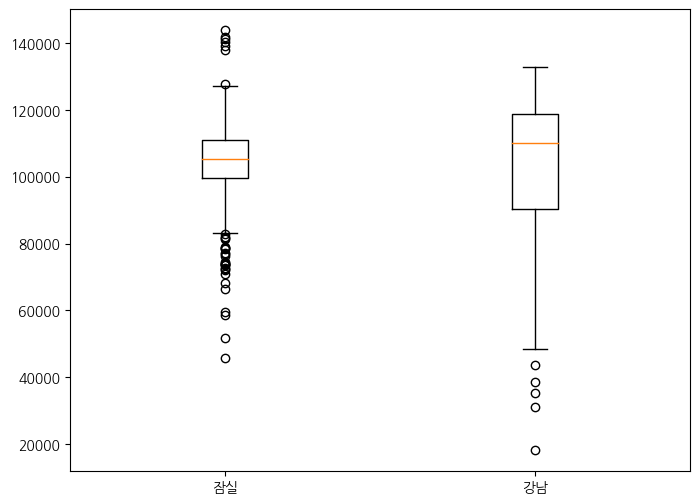

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))

axes.boxplot(
    x=[
        df[df['역명'] == '잠실']['승차총승객수'],
        df[df['역명'] == '강남']['승차총승객수']
       ],
    labels=['잠실', '강남']
)


plt.show()

In [ ]:
 df[df['역명'] == '잠실']['승차총승객수'].describe()

,승차총승객수
count,181.000000
mean,102620.569061
std,15971.143092
min,45689.000000
25%,99746.000000
50%,105216.000000
75%,110837.000000
max,143774.000000


In [ ]:
 df[df['역명'] == '강남']['승차총승객수'].describe()

,승차총승객수
count,181.000000
mean,100265.325967
std,25559.658991
min,18220.000000
25%,90478.000000
50%,109930.000000
75%,118693.000000
max,132727.000000


In [ ]:
max_value = line2_lon_lat['승차총승객수'].max()
max_value

102620.56906077349

In [ ]:
line2_lon_lat['승차총승객수'].max()

102620.56906077349

In [ ]:
import folium
from folium.plugins import HeatMap

max_value = line2_lon_lat['승차총승객수'].max()

m = folium.Map(location=[37.5350, 126.9780], zoom_start=12)

for idx, row in line2_lon_lat.iterrows():
    if row['승차총승객수'] == max_value:
        folium.Marker([row['위도'], row['경도']], popup=f"승차 총 승객 수 {int(row['승차총승객수'])}",
                  tooltip=row['역이름'] ,icon=folium.Icon(icon='star', color='orange')).add_to(m)
    else:
        folium.Marker([row['위도'], row['경도']], popup=f"승차 총 승객 수 {int(row['승차총승객수'])}",
                    tooltip=row['역이름'] ,icon=folium.Icon(icon='star')).add_to(m)

HeatMap(line2_lon_lat[['위도', '경도', '승차총승객수']], radius=25, min_opacity=0.7).add_to(m)

m